### In this notebook we will explore the suicide rate in different countries for couple of years

In [345]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### First we will load the data and get some basic information from the data

In [346]:
#load the data 
path = 'suicide-rate-data.csv'
data = pd.read_csv(path)

In [347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [348]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [349]:
data.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

### We have data from 101 countries for 32 years and for 6 age ranges.

In [439]:
#check which columns have null values
data.isnull().any()


country              False
year                 False
sex                  False
age                  False
suicides_no          False
population           False
suicides_pop_rate    False
country-year         False
HDI for year          True
yearly_gdp           False
gdp_per_capita       False
generation           False
dtype: bool

In [440]:
# HDI for year has some null value, lets see how many?
data.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides_pop_rate        0
country-year             0
HDI for year         19456
yearly_gdp               0
gdp_per_capita           0
generation               0
dtype: int64

In [441]:
#Lets see data are from which countries 
data.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [442]:
# Data collected from which years
data.year.unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016])

In [443]:
# Data collected from which age ranges
data.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '05-14 years'], dtype=object)

In [444]:
#lets do some basic clean up
data.rename(columns= {'suicides/100k pop' : 'suicides_pop_rate',' gdp_for_year ($) ':'yearly_gdp','gdp_per_capita ($)':'gdp_per_capita'},inplace=True)
data.age = data.age.str.replace("5-14 years","05-14 years")
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop_rate', 'country-year', 'HDI for year', 'yearly_gdp',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [357]:
data.yearly_gdp = data.yearly_gdp.str.replace(",",'').astype(np.int64)

### First step is investigate the number of overal suicide for each age range in all available countries

In [448]:
age_data = pd.DataFrame(data.groupby('age')['suicides_pop_rate'].mean()).sort_index()
age_data.reset_index(inplace = True)
age_data

,age,suicides_pop_rate
0,005-14 years,0.620041
1,15-24 years,8.947154
2,25-34 years,12.186885
3,35-54 years,14.947441
4,55-74 years,16.155579
5,75+ years,23.955409


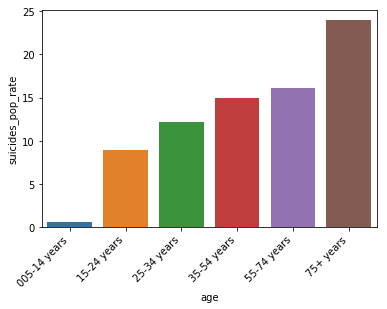

In [449]:
plt.xticks(rotation=45, ha='right')
sns.barplot(y= 'suicides_pop_rate', x= age_data.age, data = age_data);

### As seem in the plot, suicide number in increasing by age.

### Now let see how suicides number changes in different years 

In [456]:
data_age = data.groupby(["year","age"])["suicides_no", "population"].sum()
data_age_suicides = data_age.reset_index()

data_age.head()

suicides_no  population
year age                                  
1985 005-14 years          984   199192522
     15-24 years         17870   196974439
     25-34 years         20771   173536624
     35-54 years         35748   246046628
     55-74 years         28736   152769432

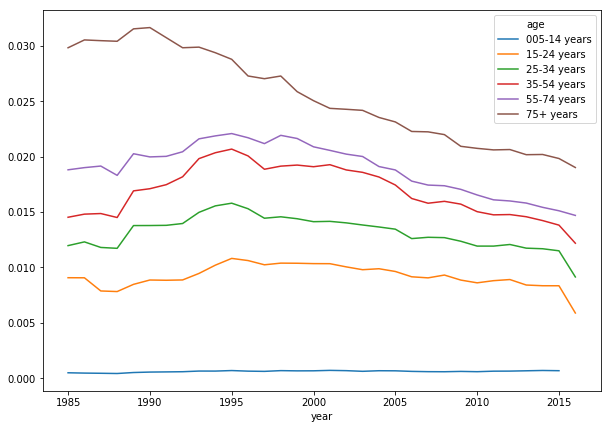

In [457]:
plt.figure(figsize=(10,7))
sns.lineplot("year", data_age_suicides.suicides_no*100/data_age_suicides.population, hue = "age",data = data_age_suicides)

### As seen in the above plot the rate of suicide is decreasing for all the age ranges

### Lets visualize the suicide rate among men and women

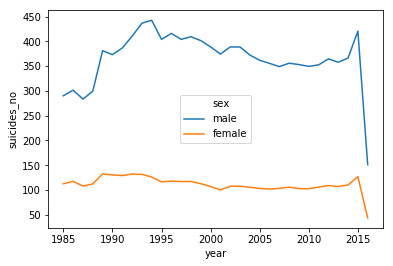

In [362]:
sns.lineplot(data.year,data.suicides_no,hue = data.sex, ci = None);

### As the data reveal the male population has a higher rate od suicide in all years.

In [474]:
#Lets compare the suicides rate to the countries yearlt gpd
country_gpd= data.groupby(["country"])["suicides_no","yearly_gdp"].mean()
country_gpd_total = country_gpd.reset_index()

# lets calculate the suicide rates per populations for each country 
country_suicide = data.groupby(['country','year'])['suicides_no'].sum()
country_suicide = country_suicide.sort_index(ascending=True)*100

country_pop= data.groupby(['country','year'])['population'].sum()
country_pop = country_pop.sort_index(ascending=True)

country_suicide_rate_total = country_suicide / country_pop
country_suicide_rate= country_suicide_rate_total.reset_index()

country_suicide_rate.set_axis(['country','year','suicide_rate'], axis = 1 , inplace = True)

In [475]:
country_suicide_rate_yearly = country_suicide_rate.groupby('country')['suicide_rate'].mean()
country_suicide_rate_yearly = country_suicide_rate_yearly.reset_index()
country_suicide_rate_yearly.sort_values(by='suicide_rate',ascending=False,inplace=True)

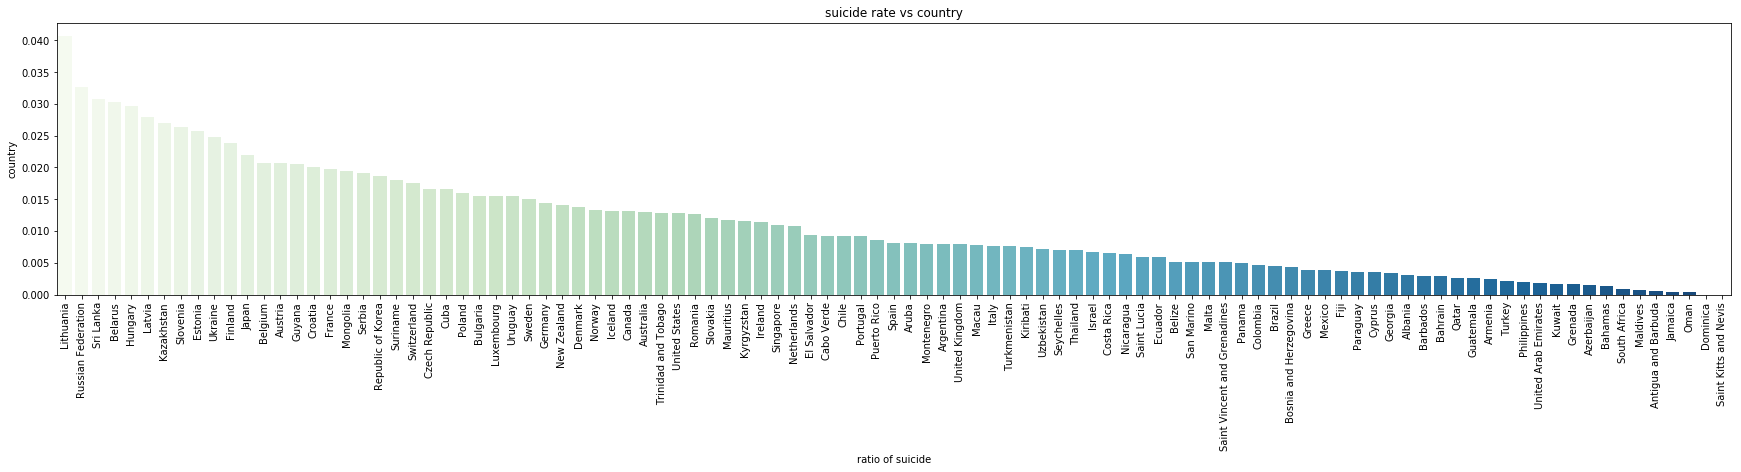

In [476]:
plt.figure(figsize=(30,5))
sns.barplot(x=country_suicide_rate_yearly.country,y=country_suicide_rate_yearly.suicide_rate, palette="GnBu", data = country_suicide_rate_yearly)
plt.xlabel("ratio of suicide")
plt.ylabel("country")
plt.title("suicide rate vs country")
plt.xticks(rotation = '90')
plt.show()

### to ge the a better undestanding of the data lets focus on the top 10 countires with highest rate of suicide

In [477]:
top_ten_countries_list = list(country_suicide_rate_yearly[:11].country)
top_countries_data = data.loc[data.country.isin(top_ten_countries_list)]

top_ten_countries_list

['Lithuania',
 'Russian Federation',
 'Sri Lanka',
 'Belarus',
 'Hungary',
 'Latvia',
 'Kazakhstan',
 'Slovenia',
 'Estonia',
 'Ukraine',
 'Finland']

### Now we would like to know if there is any correlation between the number of suicide and gpd for each country

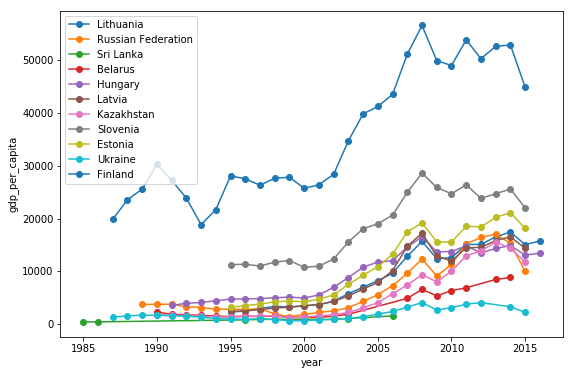

In [478]:
plt.figure(figsize = (9,6))
df_gdp = top_countries_data.groupby(['country','year'])['gdp_per_capita'].mean()

for country in top_ten_countries_list:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()

### As seen in the above plot, the yearly gpd is increasing from 2000 in most of the countries

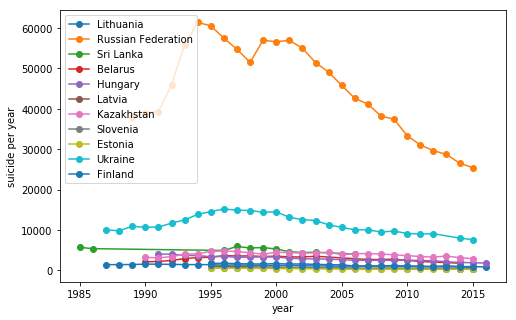

In [428]:
plt.figure(figsize = (8,5))

for country in top_ten_countries_list:
    plt.plot(country_suicide[country].index,country_suicide[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("suicide per year")
plt.legend()
plt.show()

### And as we expected by increasing the gpd, the number of the suiceds are decreasing from year 2000

### To confirm the negative correlation, lets plot the correlation between suicide rate and gpd

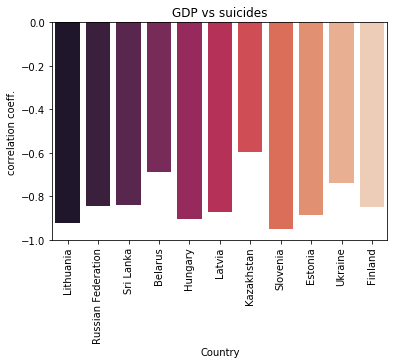

In [481]:
corr_eff = {}
for country in top_ten_countries_list:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values,country_suicide_rate_total[country].values)
    corr_eff[country] = float(r_value)
    
sns.barplot(x=list(corr_eff.keys()), y=list(corr_eff.values()), palette = "rocket")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()

### As seen in the plot, there is a high negative correlation between suicide rate and the suicide rate.